<a href="https://colab.research.google.com/github/abdyraman/hr-deep-learning/blob/main/deep_hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings
import sklearn as skl
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [22]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#check for NaN values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

There is no missing value and duplicate rows in dataset.

🧹Some of columns can be removed, because their values do not affect the analysis results.

Over18: All values are Y
EmployeeCount: all values are 1.0
StandardHours: all values are 80.0
EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [7]:
# remove 4 columns
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [8]:
unique_counts_objects = df.select_dtypes('object').nunique()
unique_counts_objects

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [9]:
# Loop through each categorical variable and print its unique values
for i in unique_counts_objects.index:
    print('Unique values of', i, set(df[i]))

Unique values of Attrition {'Yes', 'No'}
Unique values of BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of Department {'Human Resources', 'Research & Development', 'Sales'}
Unique values of EducationField {'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources', 'Life Sciences'}
Unique values of Gender {'Female', 'Male'}
Unique values of JobRole {'Manufacturing Director', 'Healthcare Representative', 'Laboratory Technician', 'Sales Representative', 'Research Scientist', 'Human Resources', 'Manager', 'Sales Executive', 'Research Director'}
Unique values of MaritalStatus {'Single', 'Married', 'Divorced'}
Unique values of OverTime {'Yes', 'No'}


In [10]:
num=df.select_dtypes('int64')
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


Data Visualisations

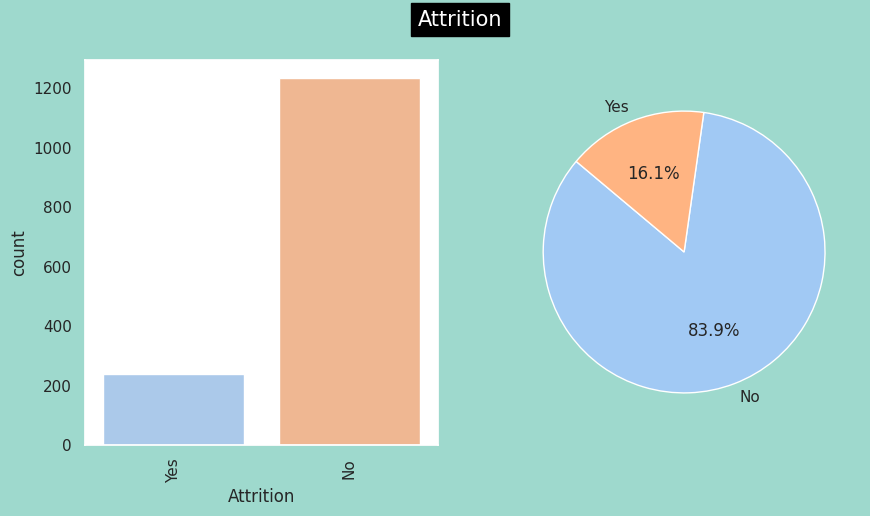

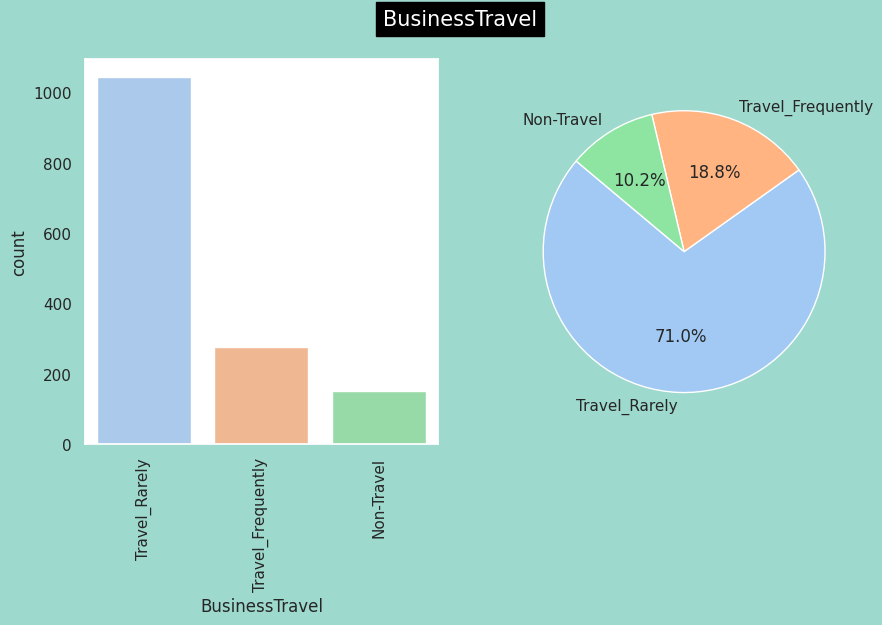

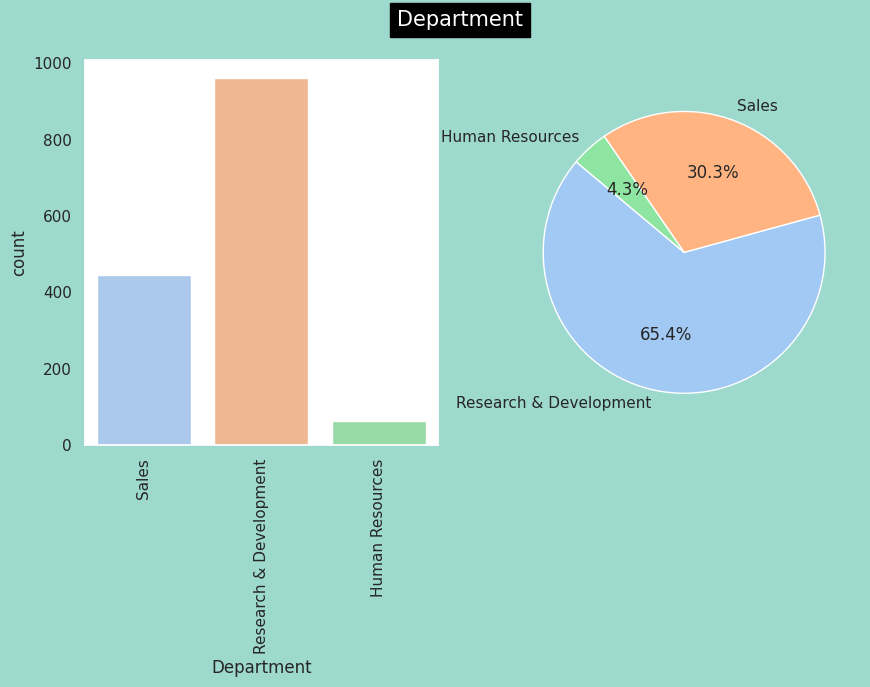

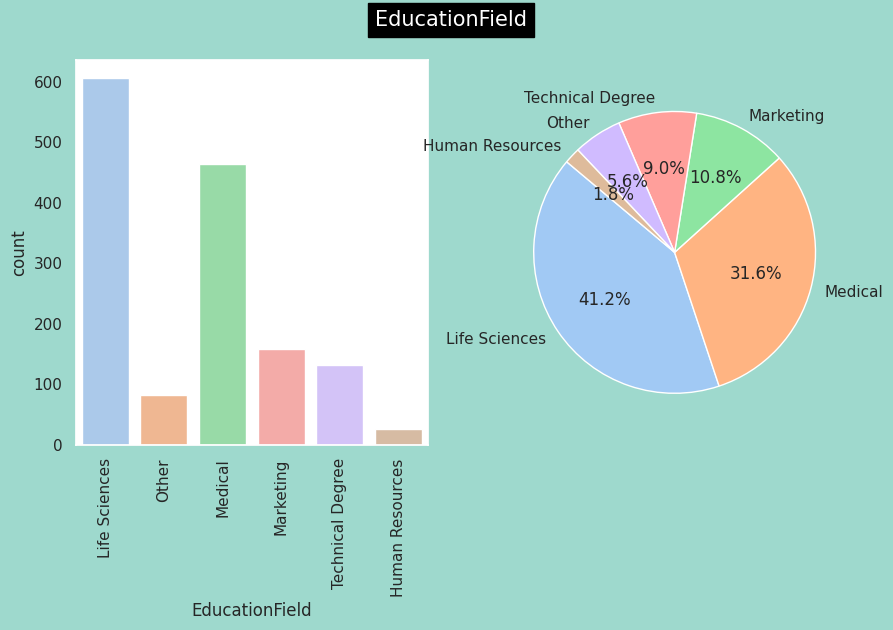

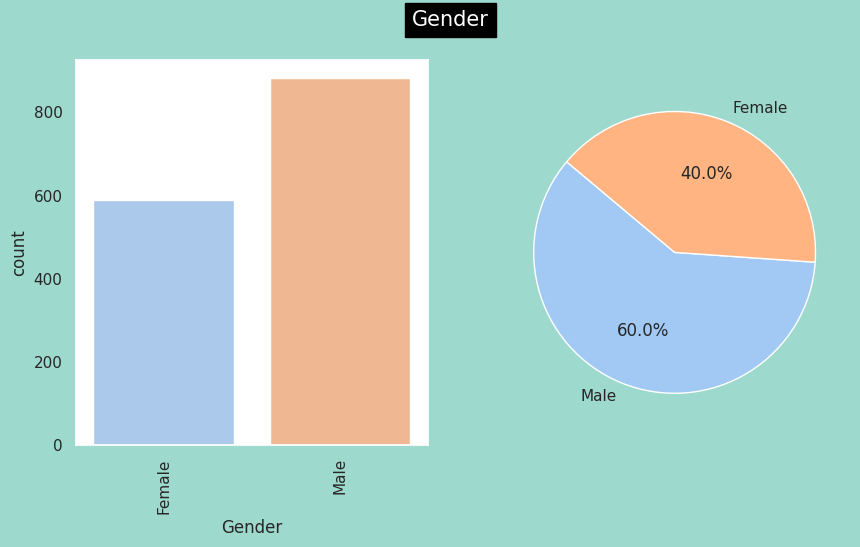

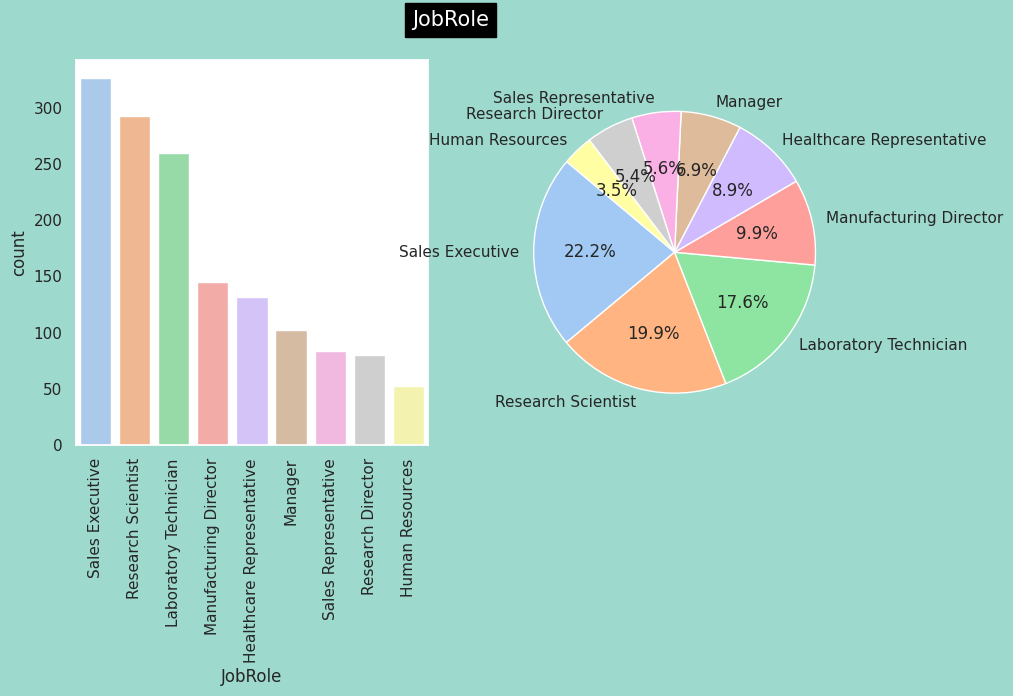

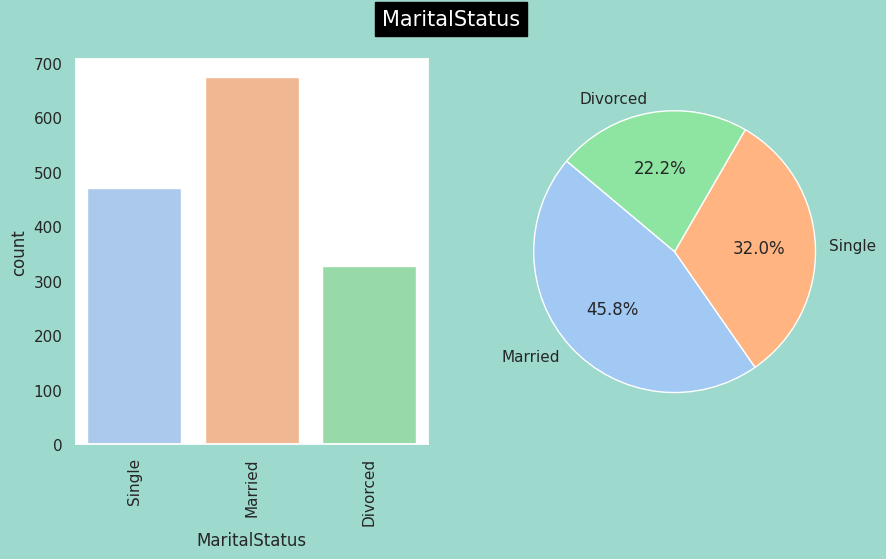

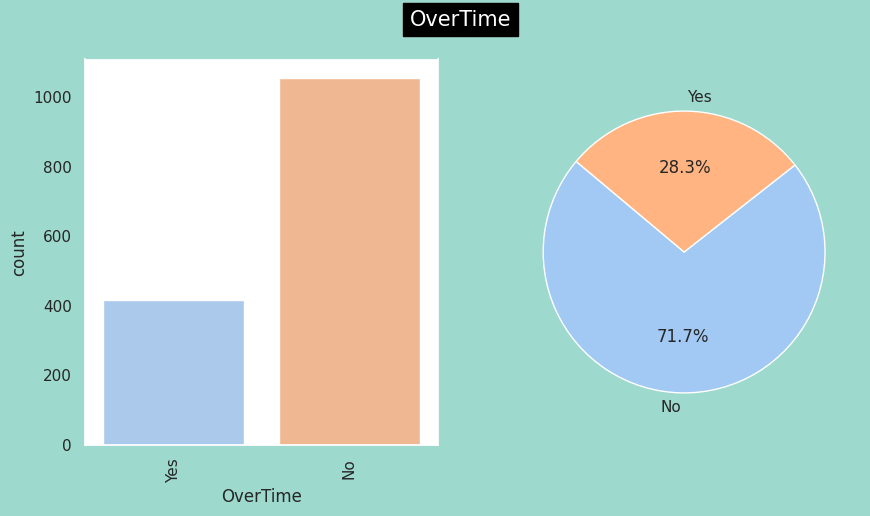

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "#9ed9cd"})
sns.set_palette("pastel")

# Loop through each categorical variable and create countplot and pie chart
for col in unique_counts_objects.index:

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Countplot
    ax1 = sns.countplot(data=df, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    # Pie chart
    count_values = df[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()


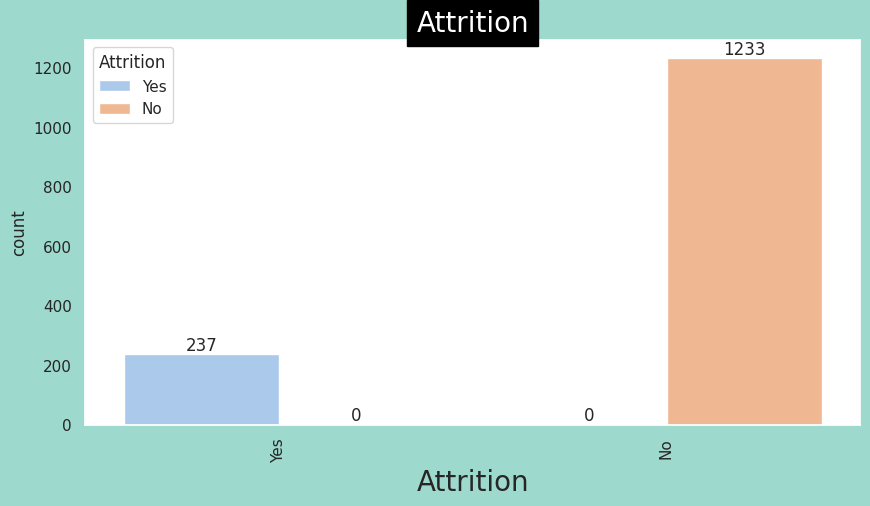

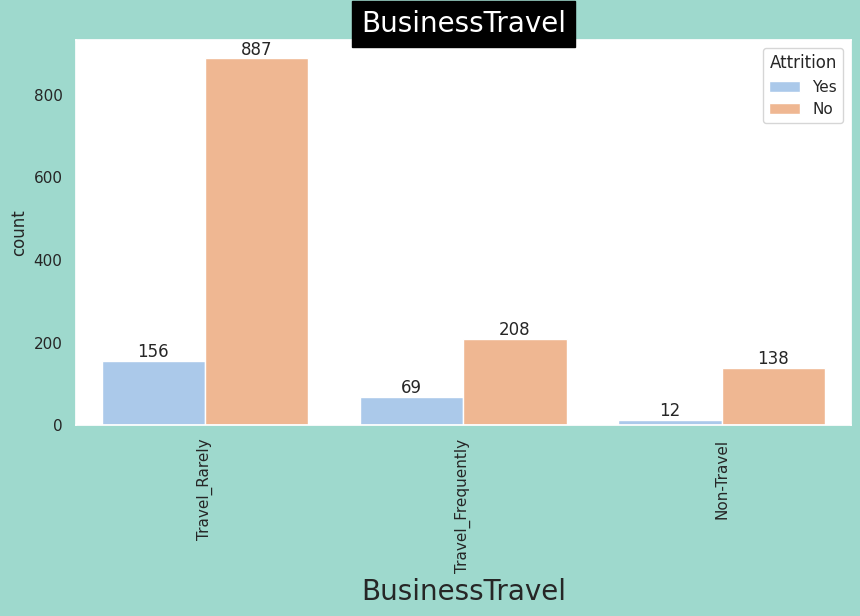

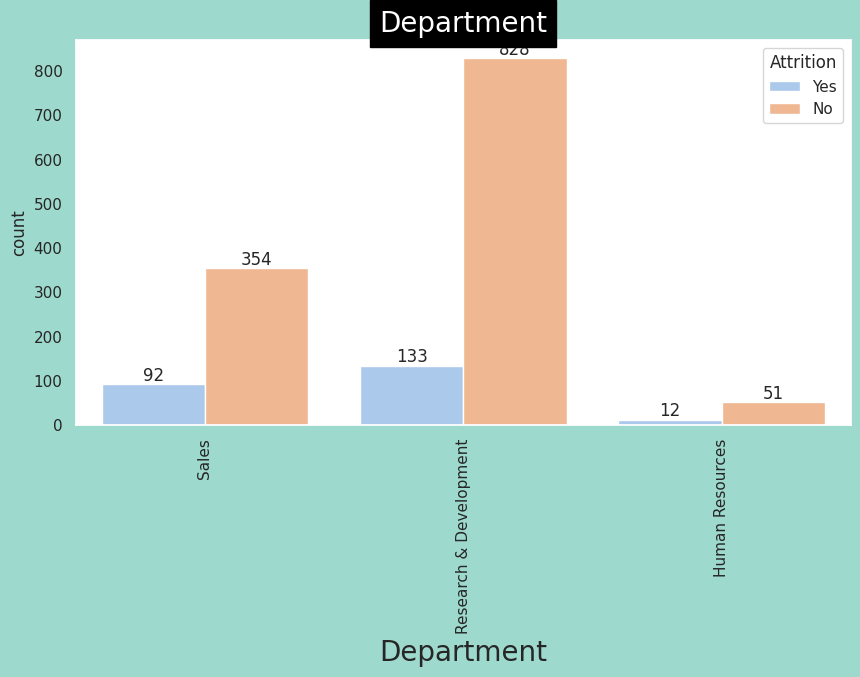

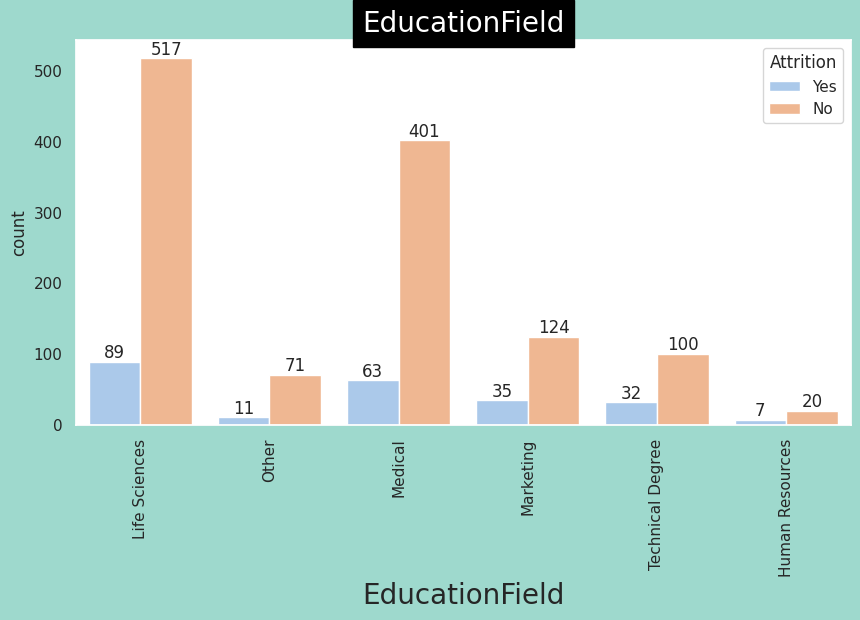

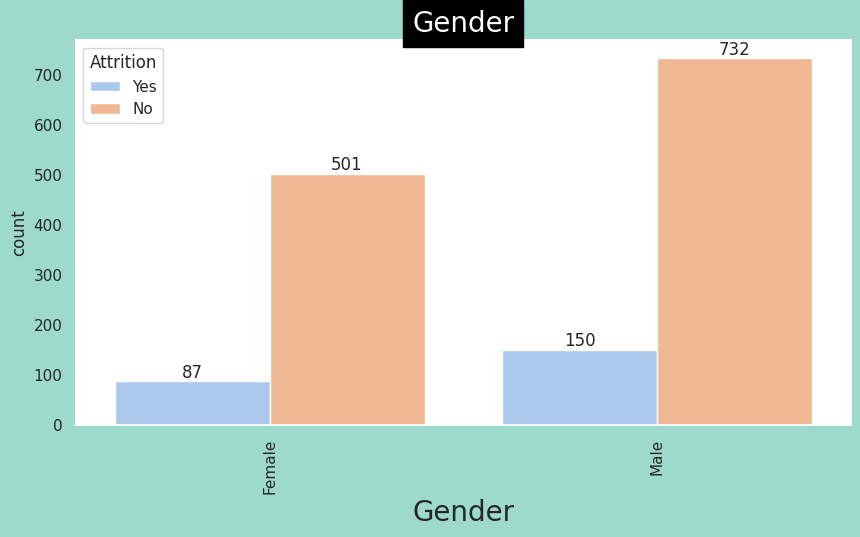

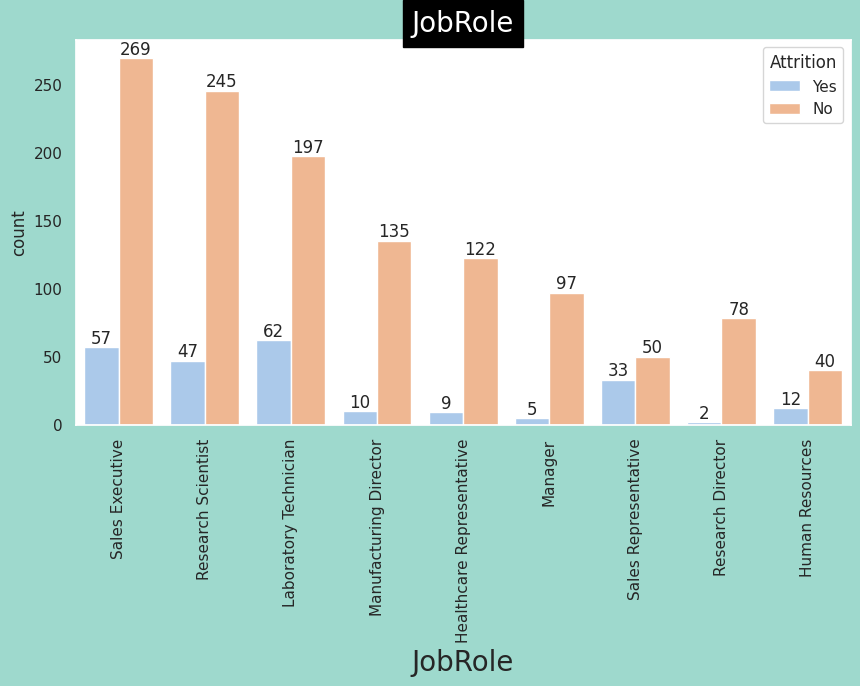

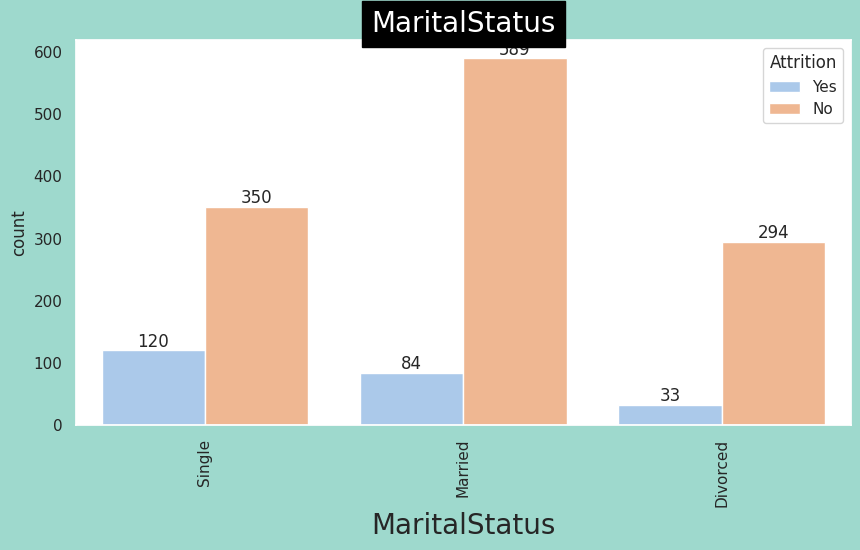

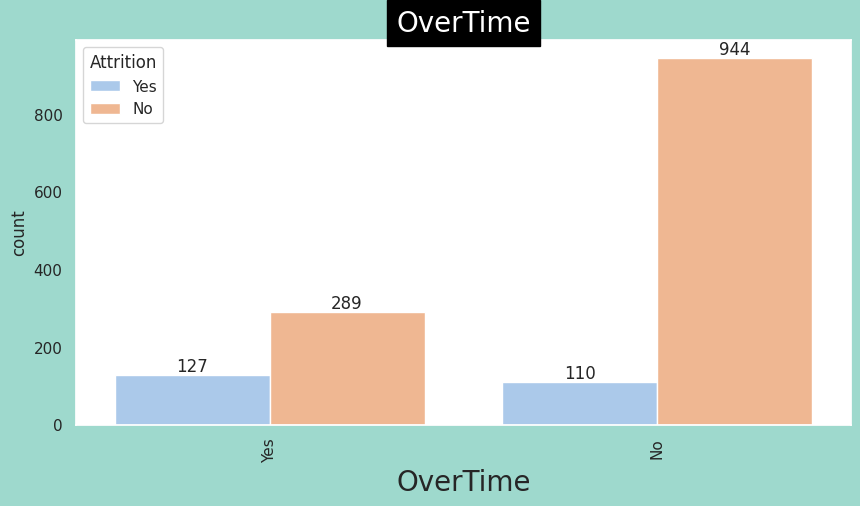

In [12]:
for column in unique_counts_objects.index:
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

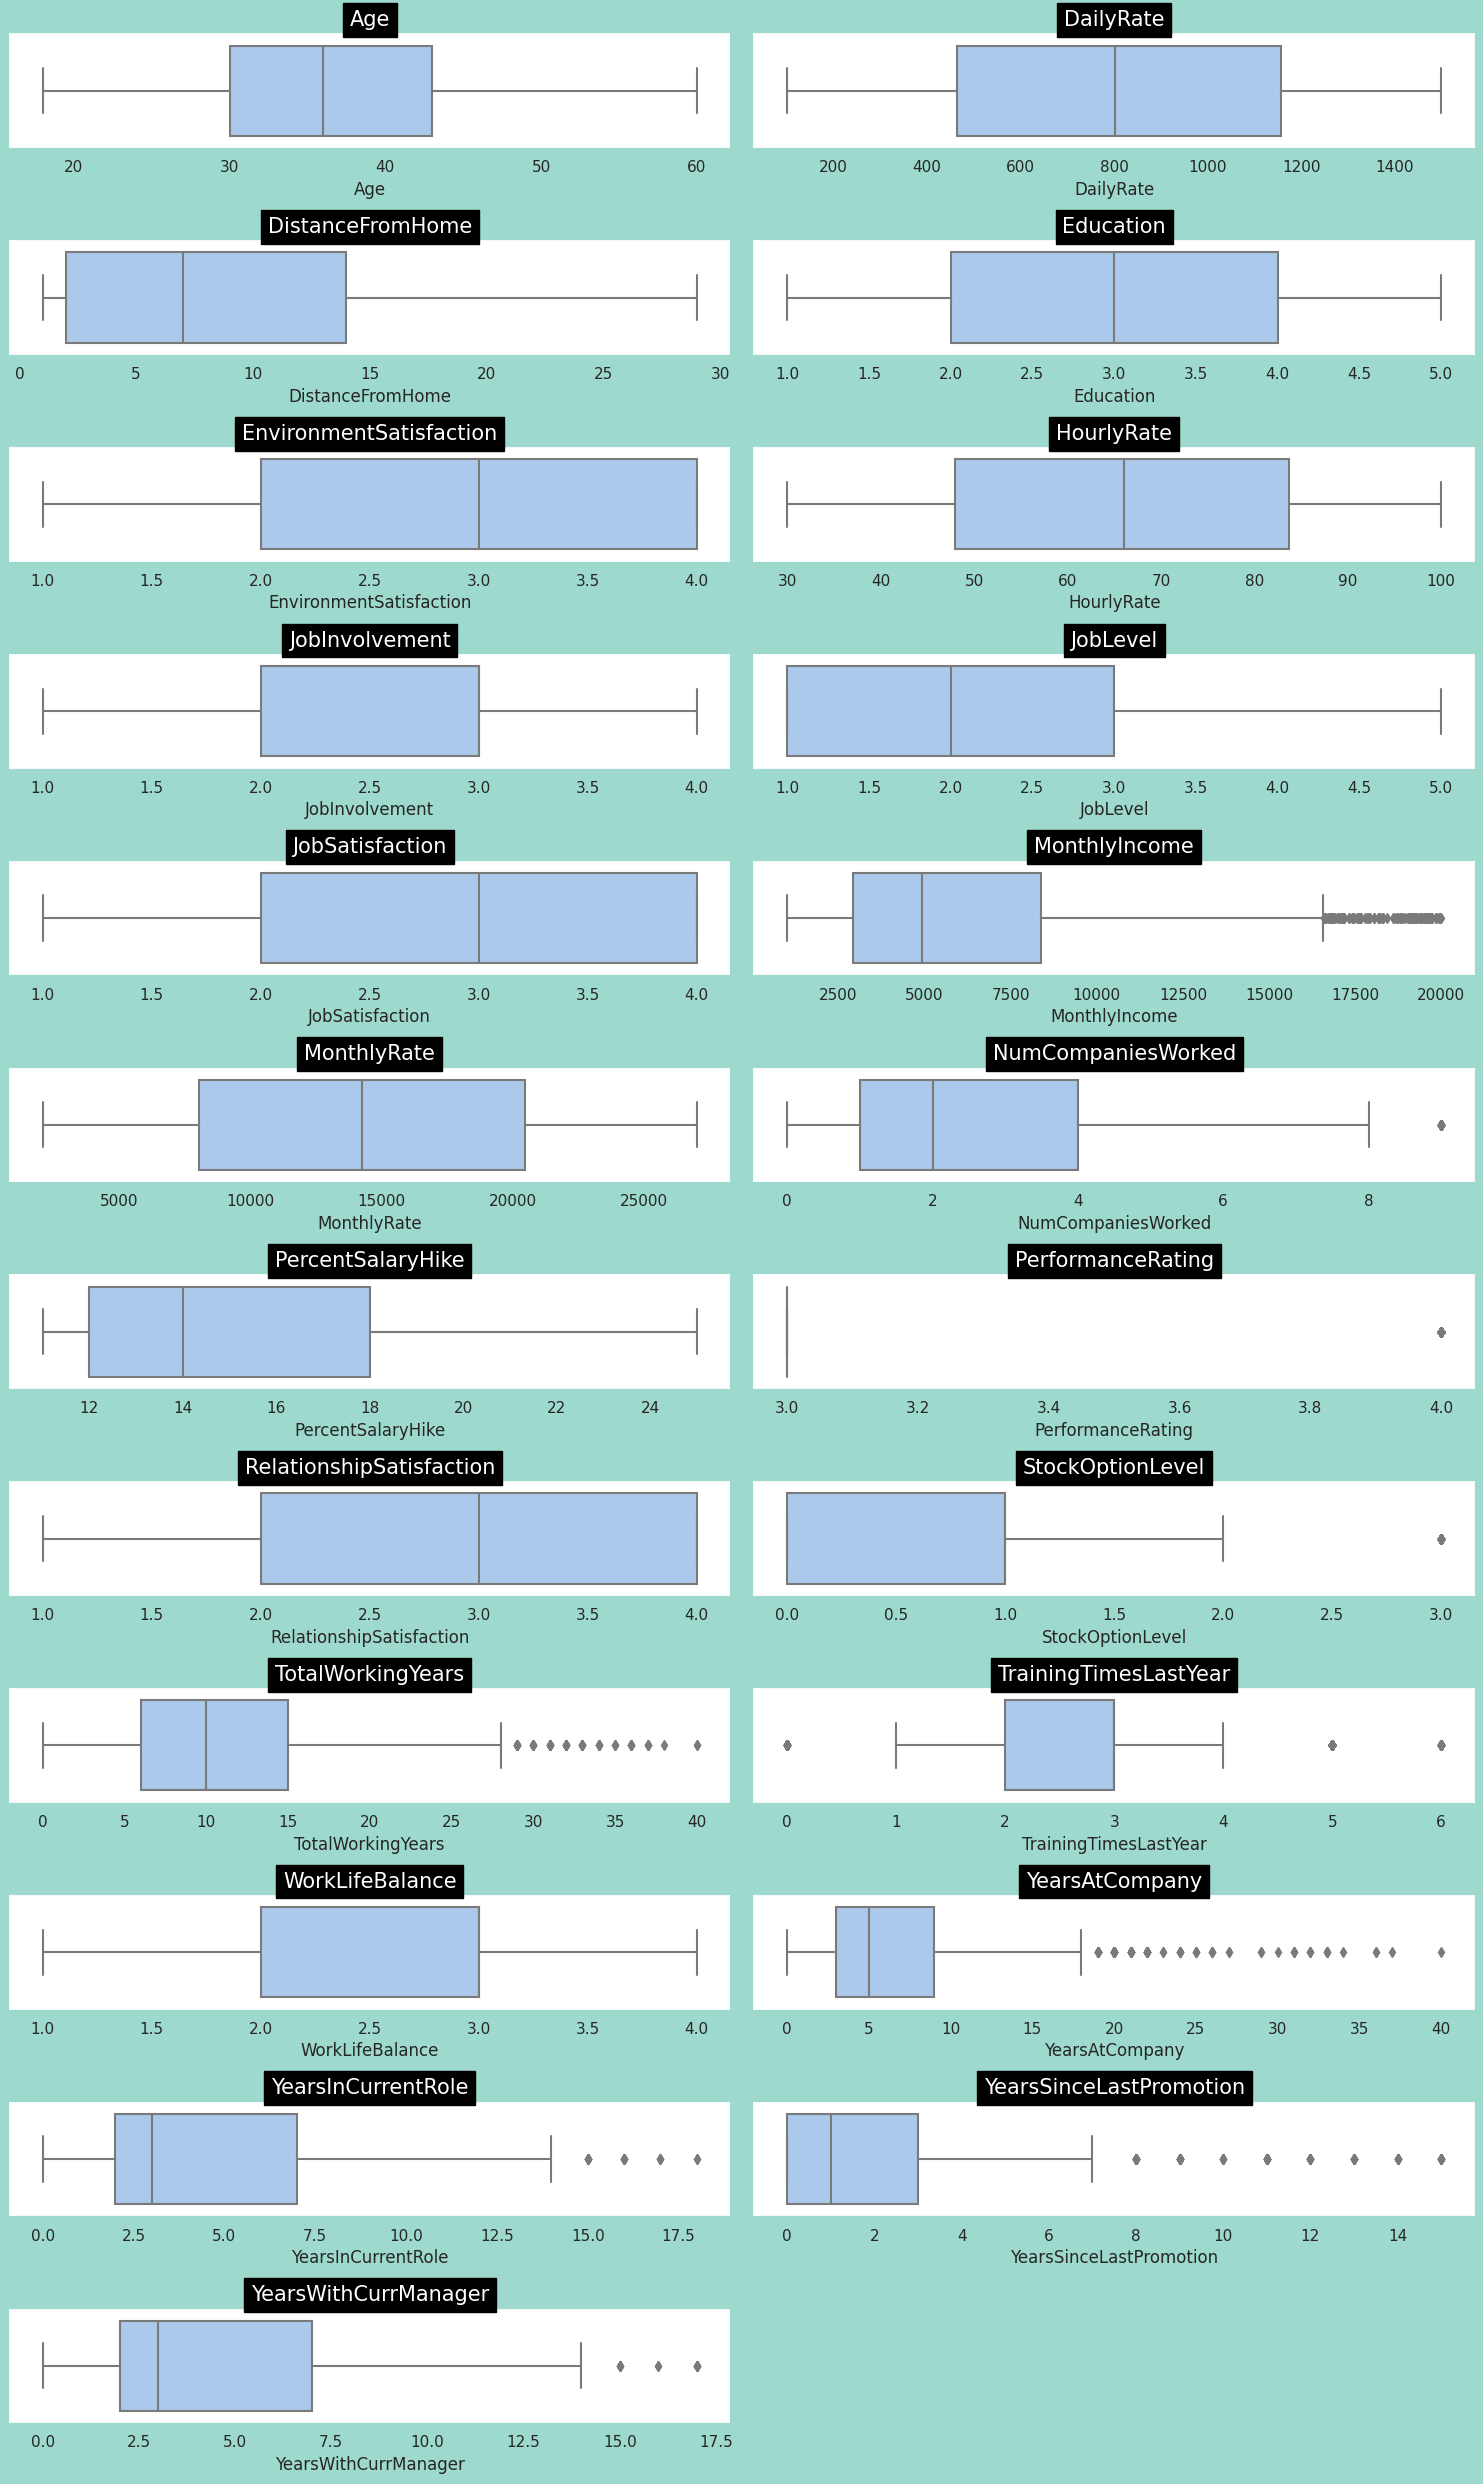

In [13]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

<Figure size 500x1000 with 0 Axes>

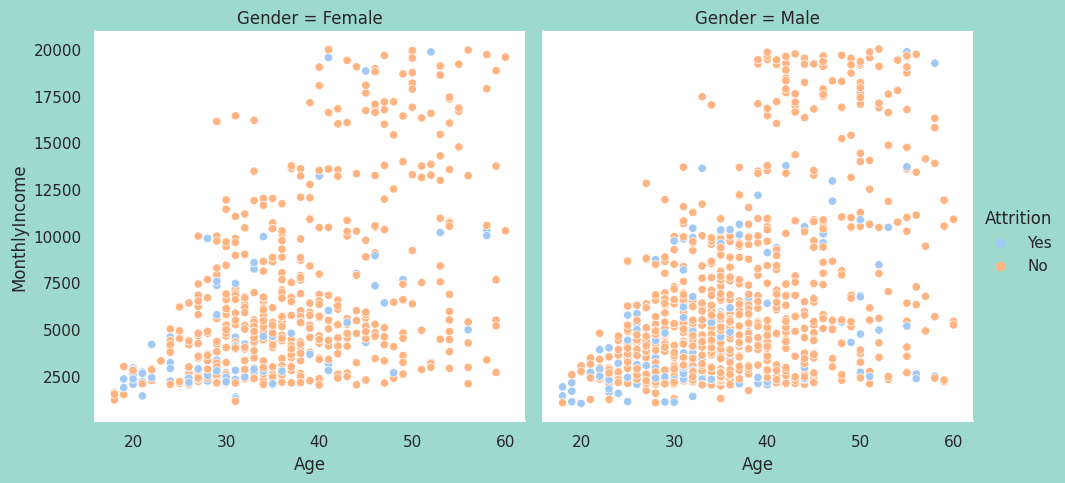

In [14]:
plt.figure(figsize=(5,10))
sns.relplot(df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

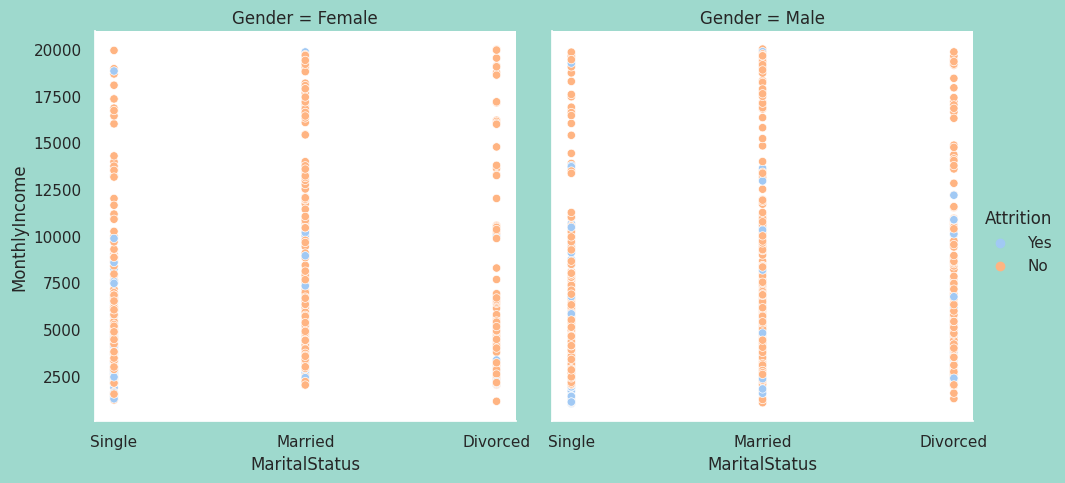

In [15]:
plt.figure(figsize=(5,10))
sns.relplot(df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

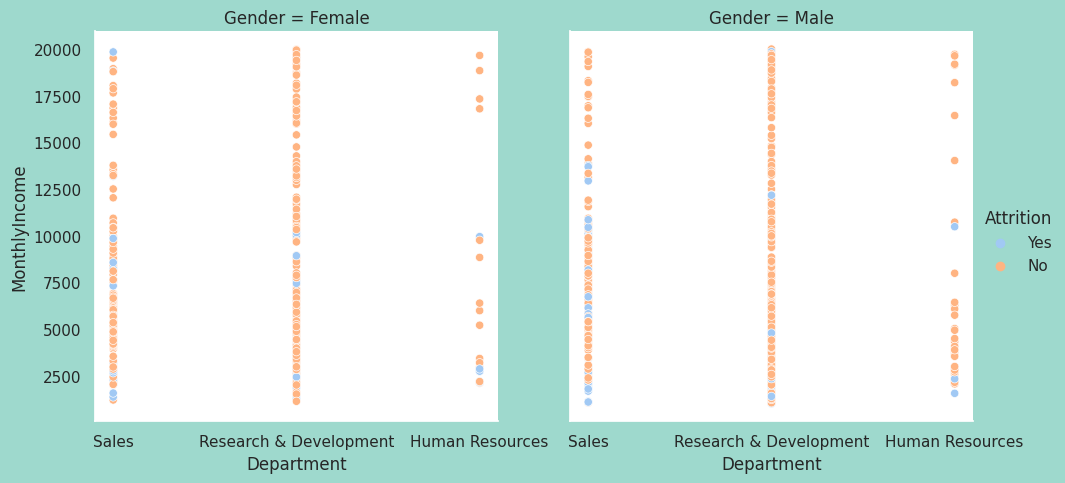

In [16]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

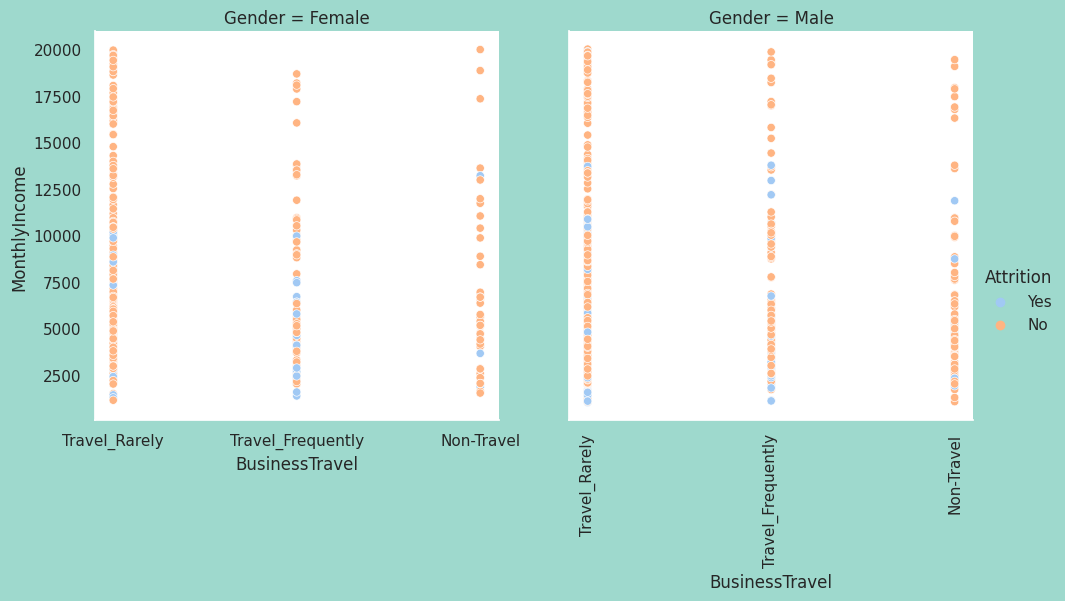

In [17]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

Machine learning

In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
DF = df.drop(columns=['Attrition'])
DF1 = pd.get_dummies(DF)
DF1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [32]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
norm = scaler.fit_transform(DF1)
norm_df = pd.DataFrame(norm,columns=DF1.columns)


In [34]:
X = pd.DataFrame(norm_df)
Y = pd.DataFrame(df.Attrition).values.reshape(-1, 1)

📝 Problem: Imbalanced Data Distribution
In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

📝 SMOTE – Oversampling
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [41]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.3 , random_state = 0)

In [42]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(x_train,y_train)

Logistic regression
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.780045351473923


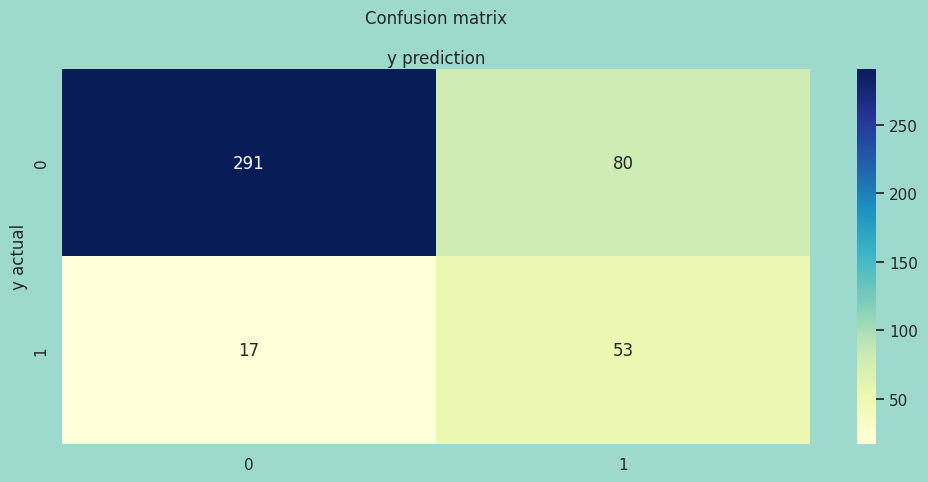

              precision    recall  f1-score   support

          No       0.94      0.78      0.86       371
         Yes       0.40      0.76      0.52        70

    accuracy                           0.78       441
   macro avg       0.67      0.77      0.69       441
weighted avg       0.86      0.78      0.80       441



In [48]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred_lg))

📝 Random Forests
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.However, data characteristics can affect their performance

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9727891156462585


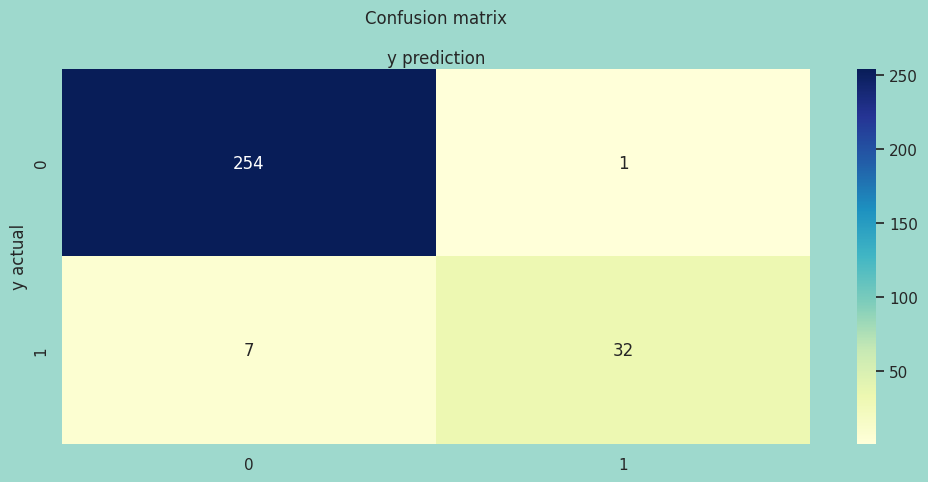

              precision    recall  f1-score   support

          No       0.97      1.00      0.98       255
         Yes       0.97      0.82      0.89        39

    accuracy                           0.97       294
   macro avg       0.97      0.91      0.94       294
weighted avg       0.97      0.97      0.97       294



In [53]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred))

📝 Gradient Boosted
Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak Tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

In [54]:
seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)

gb_predictions = gb.predict(x_test)
print('accuracy',metrics.accuracy_score(y_test, gb_predictions))

accuracy 0.9659863945578231


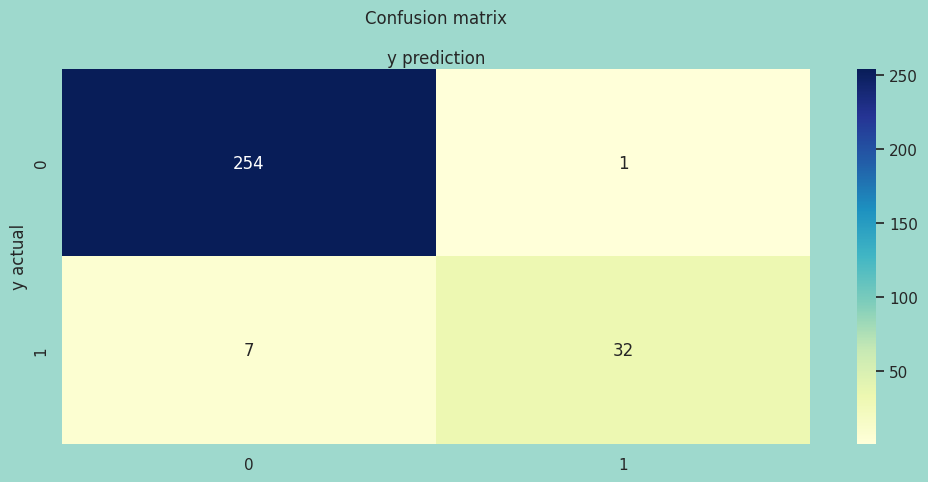

              precision    recall  f1-score   support

          No       0.97      0.99      0.98       255
         Yes       0.94      0.79      0.86        39

    accuracy                           0.97       294
   macro avg       0.95      0.89      0.92       294
weighted avg       0.97      0.97      0.96       294



In [55]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, gb_predictions))